In [1]:
import numpy as np 
import pandas as pd 
import sys, os

In [2]:
sys.path.append('../src')
from interaction import Interaction

In [3]:
slide_outs = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+CD8/KIR+CD8_filtered85/KIR+CD8_filtered85_noint_output/0.1_1_out'
machop = Interaction(slide_outs, plm_dim=32)

In [4]:
beta_interaction = machop.compute()
beta_interaction.shape

/ix/djishnu/alw399/envs/otter/lib/python3.10/site-packages/knockpy/mrc.py:276: UserWarning: 
	---------------------------------------------------------
	---------------------------------------------------------
	The choldate package is not installed:
	solving for MVR or maxent knockoffs without it will be 
	~5x slower. For instructions on how to install choldate,
	see https://amspector100.github.io/knockpy/installation.html.
	To disable this warning, set choldate_warning=False as an 
	argument or a knockoff_kwarg.
	----------------------------------------------------------
	----------------------------------------------------------

  warnings.warn(constants.CHOLDATE_WARNING)


(4, 32)

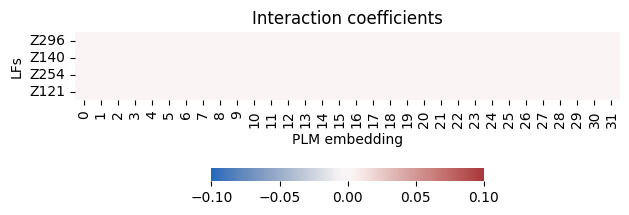

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt

beta_interaction = machop.sig_interaction
max = np.max(np.abs(beta_interaction))

fig, ax = plt.subplots()
df = pd.DataFrame(beta_interaction, index=machop.sig_LFs, columns=range(machop.l))
sns.heatmap(data=df, square=True, ax=ax, vmin=-max, vmax=max, 
            cmap='vlag', cbar_kws={'orientation': 'horizontal', 'shrink': 0.5})
_ = ax.set(ylabel='LFs', xlabel='PLM embedding', title='Interaction coefficients')

plt.tight_layout()


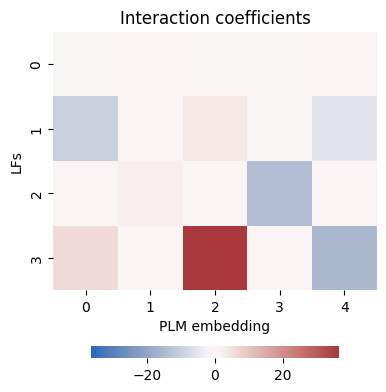

In [6]:
# first col is standalone
max = np.max(np.abs(machop.beta_all))

fig, ax = plt.subplots()
sns.heatmap(machop.beta_all, square=True, ax=ax, vmin=-max, vmax=max, 
             
            cmap='vlag', cbar_kws={'orientation': 'horizontal', 'shrink': 0.5})
_ = ax.set(ylabel='LFs', xlabel='PLM embedding', title='Interaction coefficients')

/ihome/djishnu/alw399/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/ihome/djishnu/alw399/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

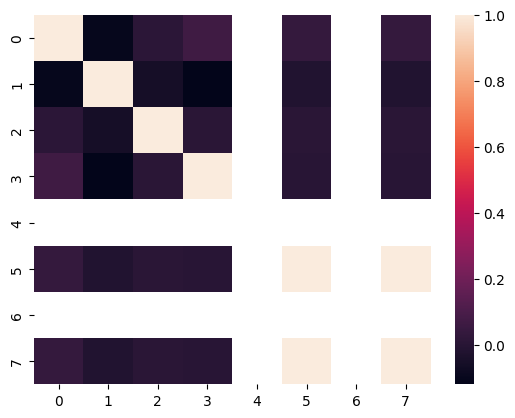

In [7]:
correlation_matrix = np.corrcoef(machop.z_matrix.T, machop.plm_embedding.T)
sns.heatmap(correlation_matrix)